# Problem Statement

# Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection

# In businesses that offer products or services, the role of a DataScientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize theiradvertising strategies and maximize sales potential.

# Importing the required libraries we have

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("car_purchasing.xlsx")
df

customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       net worth  car purchase amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 9 columns]

In [3]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', False,
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'Slovakia', 

# Checking Null values in the dataset

<Axes: >

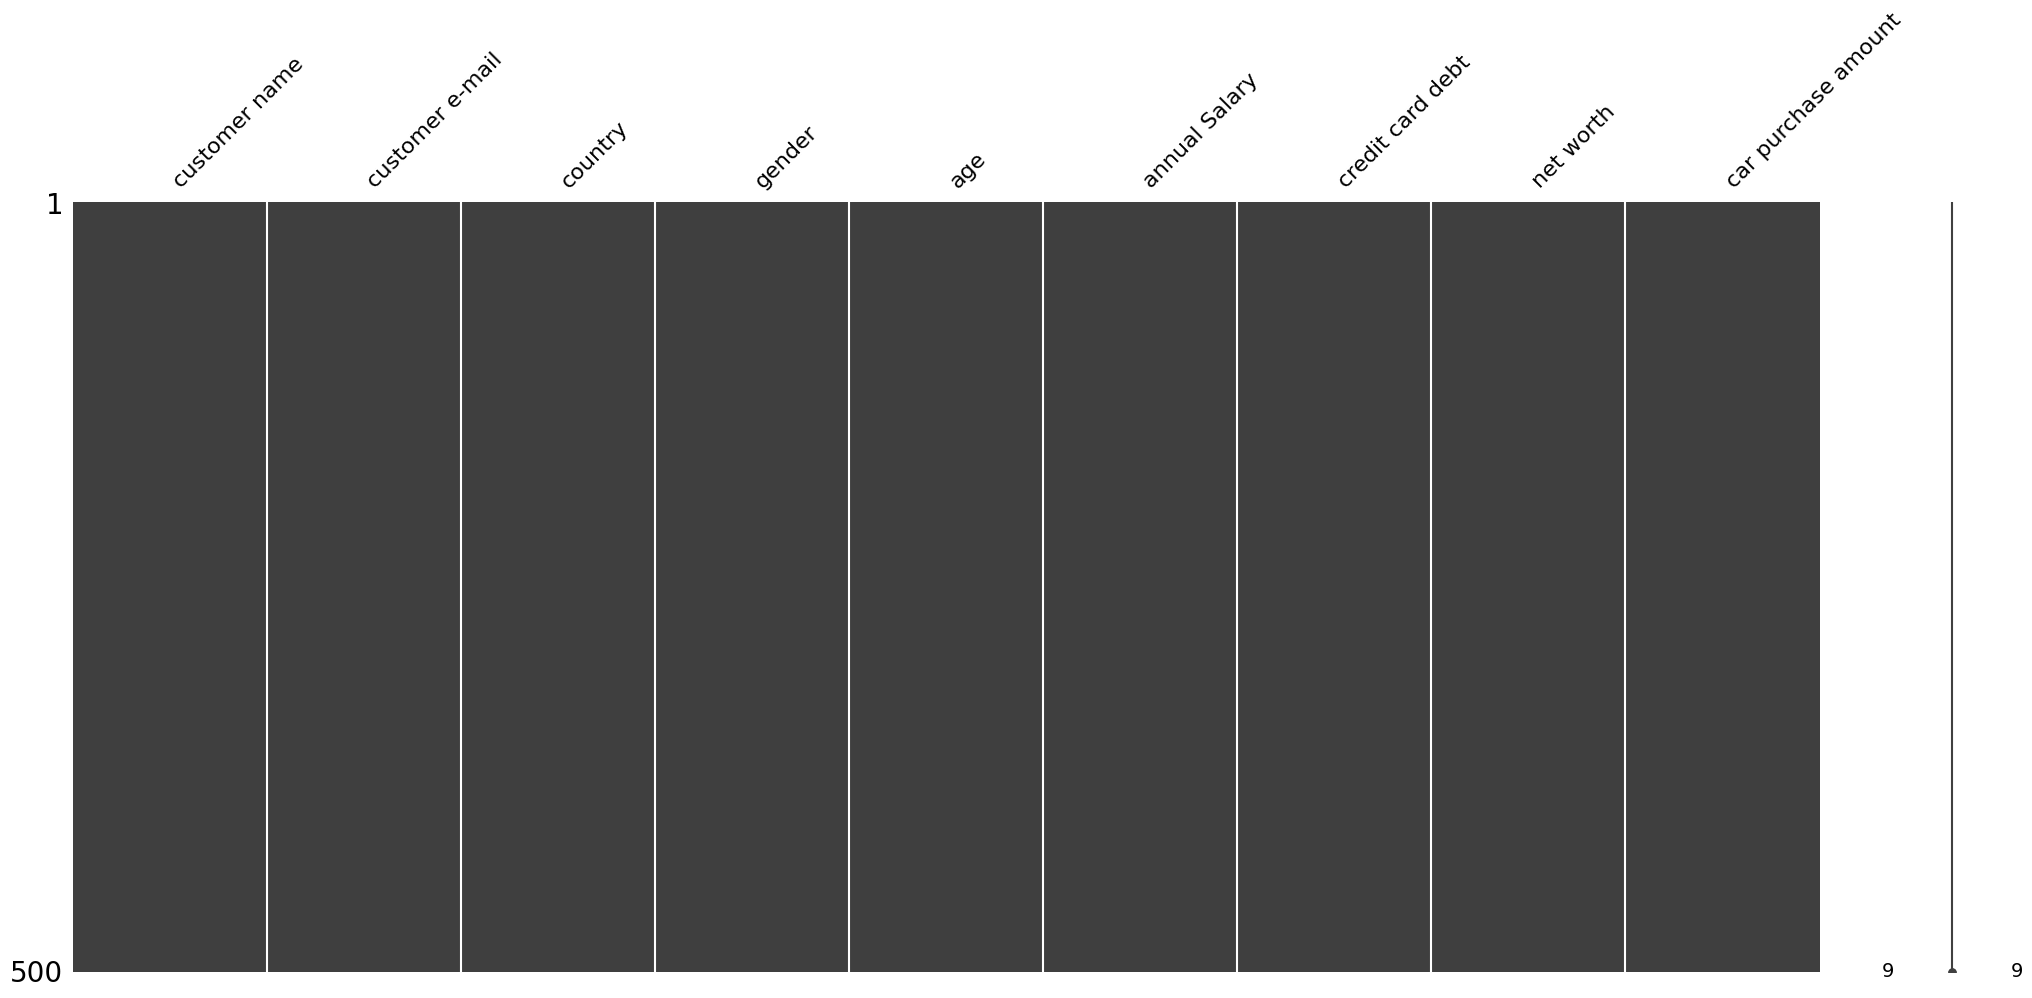

In [4]:
import missingno as msn
msn.matrix(df)

# As from the above there are no Null values present in the dateset

# Chekcing the Null values through heatmap

<Axes: >

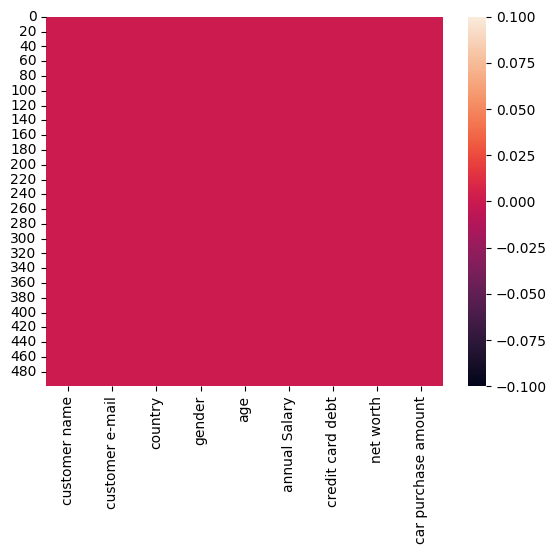

In [5]:
sns.heatmap(df.isnull())

# Data Types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [8]:
df=df.drop_duplicates()
df

customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       net worth  car purchase amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 9 columns]

In [9]:
df.duplicated().sum()

0

# There are  no Duplicate values present in the dataset

# Univariate Analysis

Text(0.5, 1.0, 'Age Distribution Visualization')

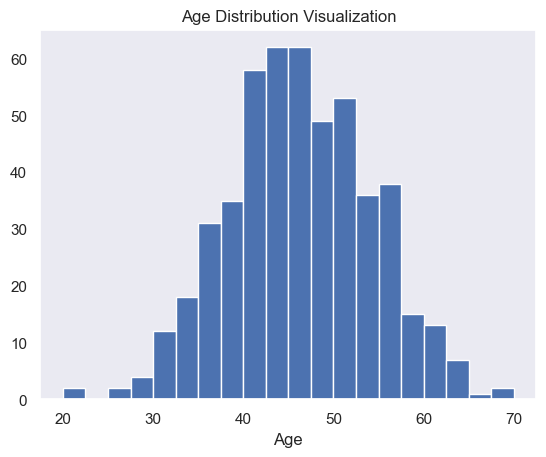

In [10]:
sns.set_theme(style="dark")
plt.hist(df['age'],bins=20)
plt.xlabel('Age')
plt.title("Age Distribution Visualization")

{'whiskers': [<matplotlib.lines.Line2D at 0x2198b5cd9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2198b5cdee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2198b5cd700>],
 'medians': [<matplotlib.lines.Line2D at 0x2198b5da340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2198b5da5e0>],
 'means': []}

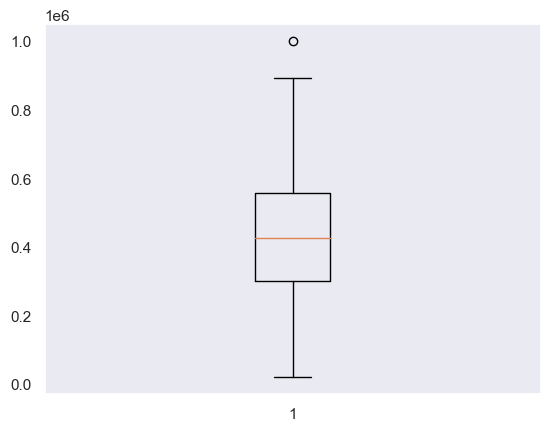

In [11]:
plt.boxplot(df['net worth'])

# Some Outliers are present in Net Worth 

{'whiskers': [<matplotlib.lines.Line2D at 0x2198b630f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2198b63e490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2198b630c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2198b63e9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2198b63ec70>],
 'means': []}

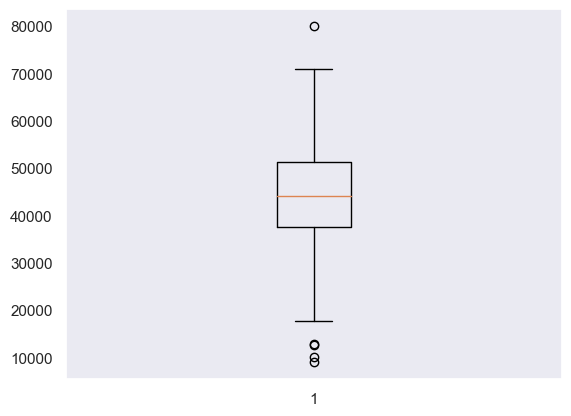

In [12]:
plt.boxplot(df['car purchase amount'])

# Outliers are present in Car purchase amount

In [13]:
df_f=df.drop(columns=["customer name","customer e-mail"],axis=1)
df_f

country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       net worth  car purchase amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 7 columns]

In [14]:
g1 = df.groupby(["country"]).size()
print(g1)

country
False                10
Afghanistan           2
Algeria               5
American Samoa        1
Andorra               4
                     ..
Wallis and Futuna     3
Western Sahara        2
Yemen                 3
Zimbabwe              2
marlal                1
Length: 209, dtype: int64


In [15]:
df.select_dtypes('object').nunique()

customer name      498
customer e-mail    500
country            209
dtype: int64

In [16]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', False,
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'Slovakia', 

In [17]:
df = df[df['country'] != False] 

In [18]:
df

customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       net worth  car purchase amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[490 rows x 9 columns]

# Removed Boolean values from column  Country

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])

C:\Users\Sayaan\AppData\Local\Temp\ipykernel_24068\2069688751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']=le.fit_transform(df['country'])


In [20]:
df

customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

     country  gender        age  annual Salary  credit card debt    net worth  \
0         27       0  41.851720    62812.09301      11609.380910  238961.2505   
1         17       0  40.870623    66646.89292       9572.957136  530973.9078   
2          1       1  43.152897    53798.55112      11160.355060  638467.1773   
3         41       1  58.271369    79370.03798      14426.164850  548599.0524   
4         26       1  57.313749    59729.15130       5358.712177  560304.0671   
..       ...     ...        ...            ...               ...          ...   
495      127       0  41.462515    71942.40291       6995.902524  541670.1016   
496      206       1  37.642000    56039.49793      12301.456790  360419.0988   
497      143       1  53.943497    68888.77805      10611.606860  764531.3203   
498       24       1  59.160509    49811.99062      14013.034510  337826.6382   
499      207       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[490 rows x 9 columns]

In [21]:
df=df.drop(columns=['customer name','customer e-mail'],axis=1)
df

country  gender        age  annual Salary  credit card debt    net worth  \
0         27       0  41.851720    62812.09301      11609.380910  238961.2505   
1         17       0  40.870623    66646.89292       9572.957136  530973.9078   
2          1       1  43.152897    53798.55112      11160.355060  638467.1773   
3         41       1  58.271369    79370.03798      14426.164850  548599.0524   
4         26       1  57.313749    59729.15130       5358.712177  560304.0671   
..       ...     ...        ...            ...               ...          ...   
495      127       0  41.462515    71942.40291       6995.902524  541670.1016   
496      206       1  37.642000    56039.49793      12301.456790  360419.0988   
497      143       1  53.943497    68888.77805      10611.606860  764531.3203   
498       24       1  59.160509    49811.99062      14013.034510  337826.6382   
499      207       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[490 rows x 7 columns]

# Bivariate anlaysis

<Axes: xlabel='gender', ylabel='count'>

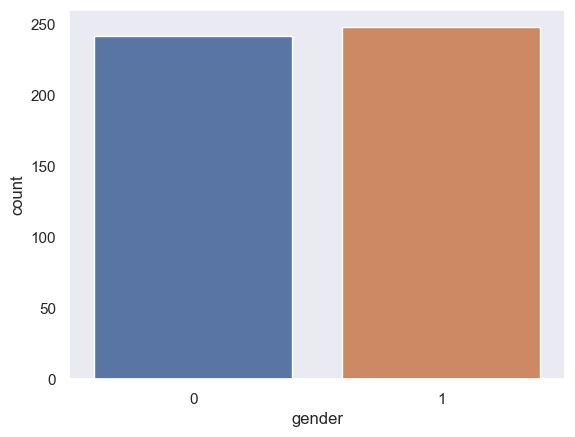

In [22]:
sns.countplot(x='gender',data=df)

In [23]:
df['gender'].value_counts()

1    248
0    242
Name: gender, dtype: int64

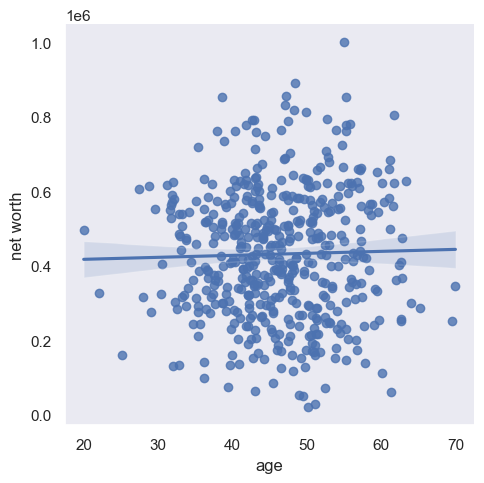

In [24]:
sns.lmplot(x='age',y='net worth',data=df)

In [25]:
df

country  gender        age  annual Salary  credit card debt    net worth  \
0         27       0  41.851720    62812.09301      11609.380910  238961.2505   
1         17       0  40.870623    66646.89292       9572.957136  530973.9078   
2          1       1  43.152897    53798.55112      11160.355060  638467.1773   
3         41       1  58.271369    79370.03798      14426.164850  548599.0524   
4         26       1  57.313749    59729.15130       5358.712177  560304.0671   
..       ...     ...        ...            ...               ...          ...   
495      127       0  41.462515    71942.40291       6995.902524  541670.1016   
496      206       1  37.642000    56039.49793      12301.456790  360419.0988   
497      143       1  53.943497    68888.77805      10611.606860  764531.3203   
498       24       1  59.160509    49811.99062      14013.034510  337826.6382   
499      207       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[490 rows x 7 columns]

# Age's of debt

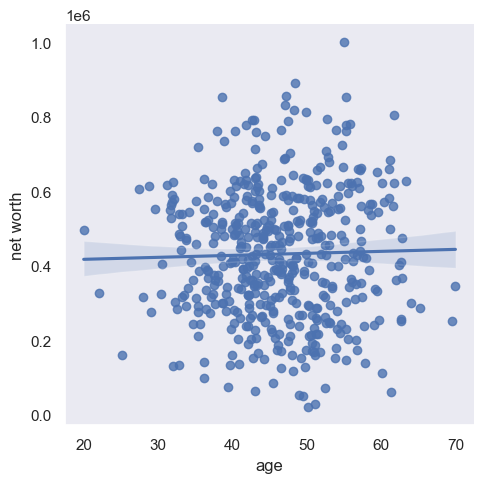

In [26]:
sns.lmplot(x='age',y='net worth',data=df)

<Axes: xlabel='gender', ylabel='net worth'>

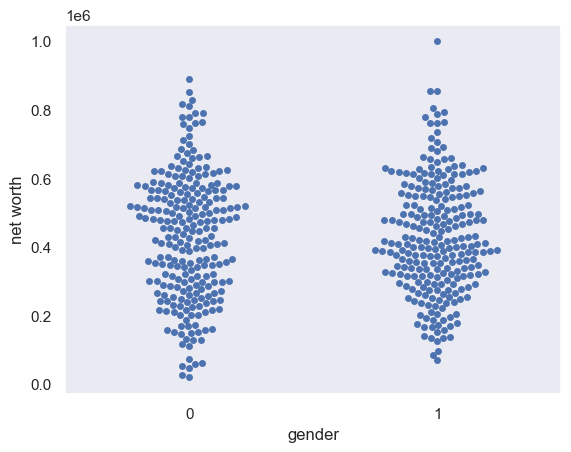

In [27]:
sns.swarmplot(x='gender',y='net worth',data=df)

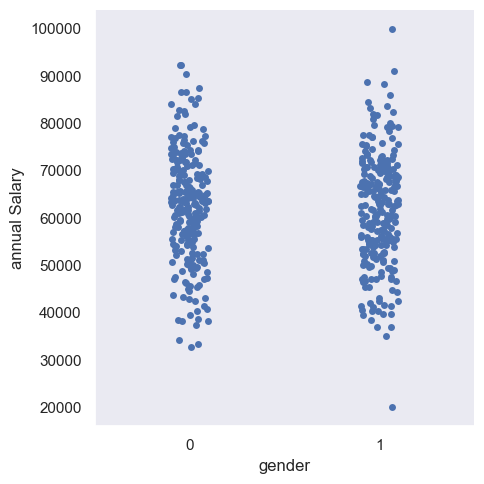

In [28]:
sns.catplot(x='gender',y='annual Salary',data=df)

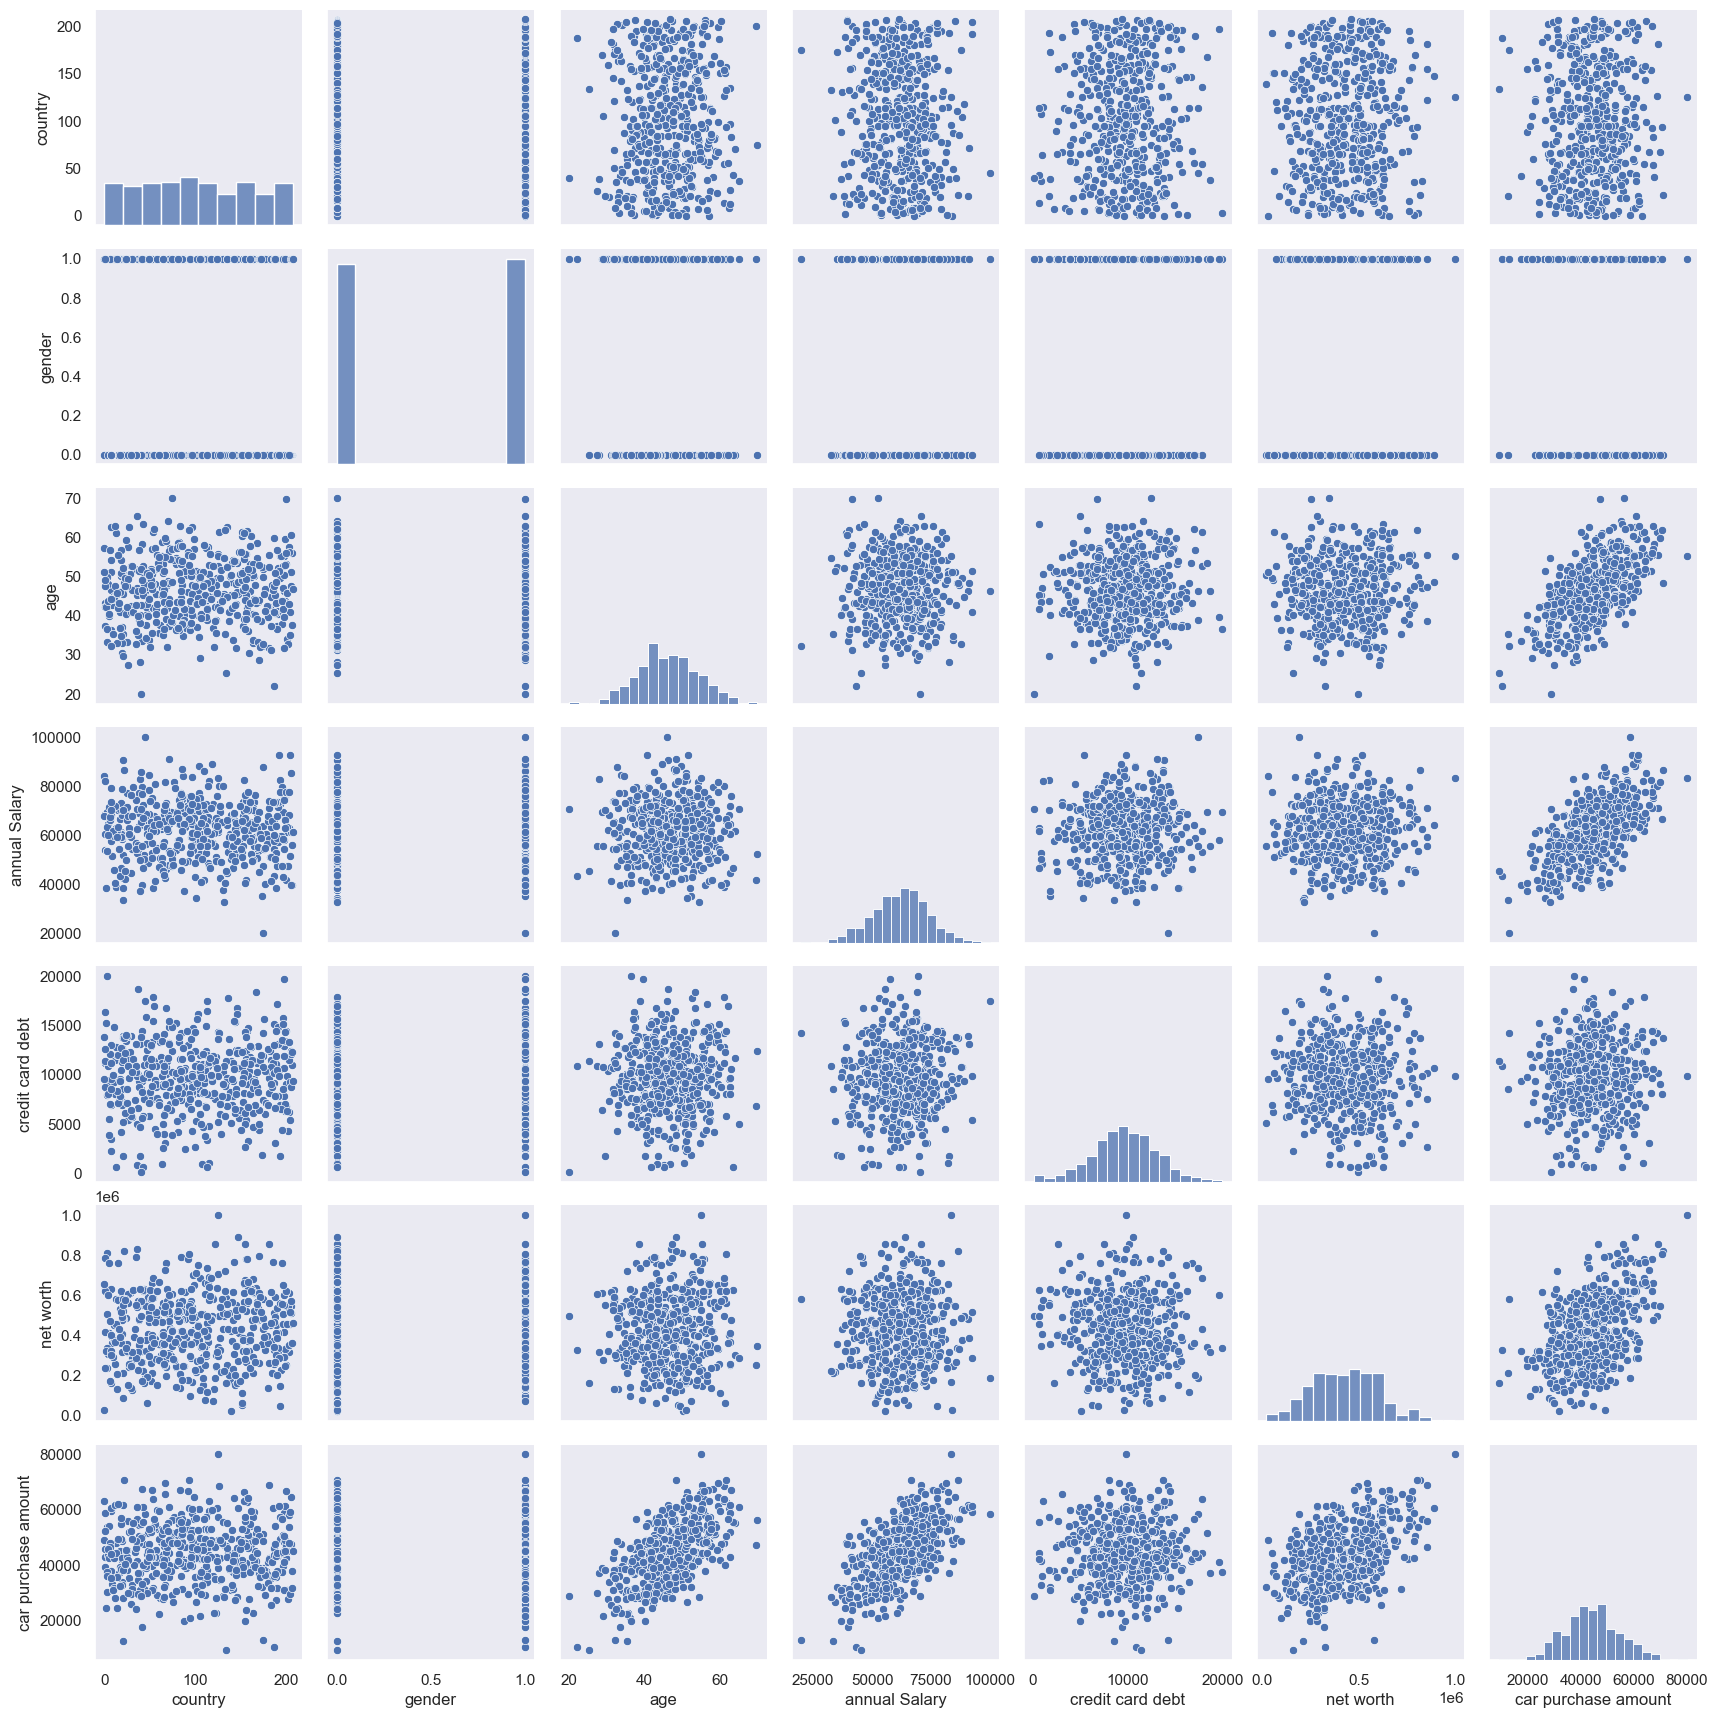

In [29]:
sns.pairplot(df)

In [30]:
from ydata_profiling import ProfileReport

In [31]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df.columns

Index(['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth', 'car purchase amount'],
      dtype='object')

<Axes: >

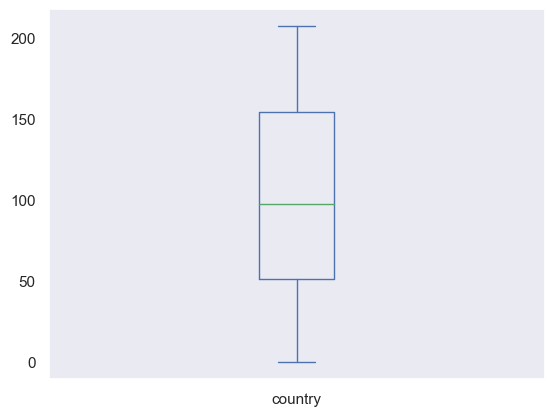

In [33]:
df['country'].plot.box()

country                   Axes(0.125,0.53;0.0945122x0.35)
gender                 Axes(0.238415,0.53;0.0945122x0.35)
age                    Axes(0.351829,0.53;0.0945122x0.35)
annual Salary          Axes(0.465244,0.53;0.0945122x0.35)
credit card debt       Axes(0.578659,0.53;0.0945122x0.35)
net worth              Axes(0.692073,0.53;0.0945122x0.35)
car purchase amount    Axes(0.805488,0.53;0.0945122x0.35)
dtype: object

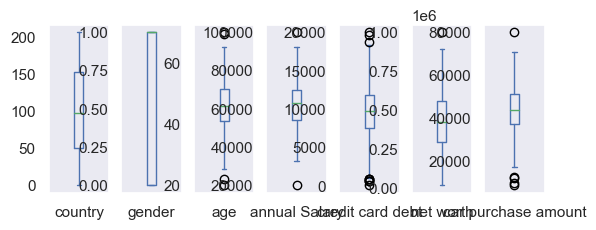

In [34]:
df.plot(kind='box',subplots=True,layout=(2,7))

<Axes: >

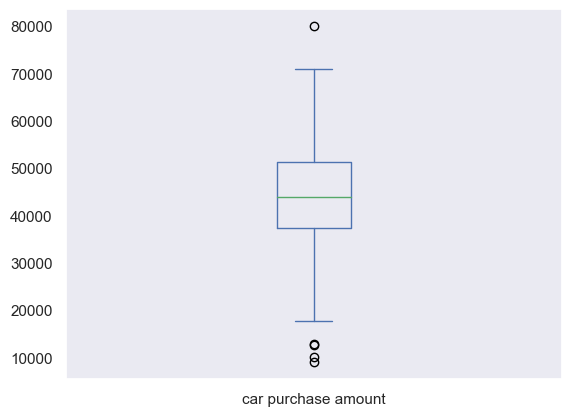

In [38]:
df['car purchase amount'].plot.box()

# Removing Ourliers from the above Data we have

In [40]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
z

country    gender       age  annual Salary  credit card debt  net worth  \
0    1.240966  1.012321  0.546473       0.065910          0.556368   1.110061   
1    1.409305  1.012321  0.669010       0.392934          0.030409   0.577915   
2    1.678647  0.987829  0.383958       0.702746          0.426985   1.199279   
3    1.005292  0.987829  1.504313       1.477937          1.367997   0.679797   
4    1.257800  0.987829  1.384707       0.196997          1.244704   0.747458   
..        ...       ...       ...            ...               ...        ...   
495  0.442422  1.012321  0.595084       0.844524          0.772963   0.639745   
496  1.772299  0.987829  1.072260       0.511643          0.755783   0.407975   
497  0.711764  0.987829  0.963769       0.584117          0.268868   1.927992   
498  1.291468  0.987829  1.615364       1.042711          1.248958   0.538571   
499  1.789133  0.987829  0.062960       0.057011          0.082740   0.184684   

     car purchase amount  
0               0.817696  
1               0.091060  
2               0.112125  
3               2.160832  
4               1.093148  
..                   ...  
495             0.442342  
496             1.173072  
497             1.856949  
498             0.121367  
499             0.090290  

[490 rows x 7 columns]

In [41]:
np.where(z>3)

(array([ 28,  37,  37,  88, 306, 306, 434, 443], dtype=int64),
 array([3, 2, 6, 3, 5, 6, 2, 6], dtype=int64))

In [42]:
dfn=df[(z<3).all(axis=1)]
dfn

country  gender        age  annual Salary  credit card debt    net worth  \
0         27       0  41.851720    62812.09301      11609.380910  238961.2505   
1         17       0  40.870623    66646.89292       9572.957136  530973.9078   
2          1       1  43.152897    53798.55112      11160.355060  638467.1773   
3         41       1  58.271369    79370.03798      14426.164850  548599.0524   
4         26       1  57.313749    59729.15130       5358.712177  560304.0671   
..       ...     ...        ...            ...               ...          ...   
495      127       0  41.462515    71942.40291       6995.902524  541670.1016   
496      206       1  37.642000    56039.49793      12301.456790  360419.0988   
497      143       1  53.943497    68888.77805      10611.606860  764531.3203   
498       24       1  59.160509    49811.99062      14013.034510  337826.6382   
499      207       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[484 rows x 7 columns]

# Removed Outlies from the above Data

In [43]:
df1=dfn.copy()

# Checking Skewness in the above data we have 

In [44]:
df1.skew()

country                0.085114
gender                -0.008290
age                    0.136361
annual Salary         -0.064884
credit card debt      -0.060962
net worth              0.092248
car purchase amount    0.043726
dtype: float64

In [48]:
dfn

country  gender        age  annual Salary  credit card debt    net worth  \
0         27       0  41.851720    62812.09301      11609.380910  238961.2505   
1         17       0  40.870623    66646.89292       9572.957136  530973.9078   
2          1       1  43.152897    53798.55112      11160.355060  638467.1773   
3         41       1  58.271369    79370.03798      14426.164850  548599.0524   
4         26       1  57.313749    59729.15130       5358.712177  560304.0671   
..       ...     ...        ...            ...               ...          ...   
495      127       0  41.462515    71942.40291       6995.902524  541670.1016   
496      206       1  37.642000    56039.49793      12301.456790  360419.0988   
497      143       1  53.943497    68888.77805      10611.606860  764531.3203   
498       24       1  59.160509    49811.99062      14013.034510  337826.6382   
499      207       1  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[484 rows x 7 columns]

In [47]:
x=dfn.iloc[:,:-1]
x

country  gender        age  annual Salary  credit card debt    net worth
0         27       0  41.851720    62812.09301      11609.380910  238961.2505
1         17       0  40.870623    66646.89292       9572.957136  530973.9078
2          1       1  43.152897    53798.55112      11160.355060  638467.1773
3         41       1  58.271369    79370.03798      14426.164850  548599.0524
4         26       1  57.313749    59729.15130       5358.712177  560304.0671
..       ...     ...        ...            ...               ...          ...
495      127       0  41.462515    71942.40291       6995.902524  541670.1016
496      206       1  37.642000    56039.49793      12301.456790  360419.0988
497      143       1  53.943497    68888.77805      10611.606860  764531.3203
498       24       1  59.160509    49811.99062      14013.034510  337826.6382
499      207       1  46.731152    61370.67766       9391.341628  462946.4924

[484 rows x 6 columns]

In [49]:
y=dfn.iloc[:,-1]
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 484, dtype: float64

In [50]:
x.shape

(484, 6)

In [51]:
y.shape

(484,)

# Building Machine Learning Model for the following we have

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split

In [59]:
lr=LinearRegression()

In [60]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.34,random_state=42)

In [61]:
train_x.shape

(319, 6)

In [62]:
test_x.shape

(165, 6)

In [63]:
lr.fit(train_x,train_y)

LinearRegression()

In [65]:
lr.coef_

array([ 9.06282510e-04, -2.70331033e-02,  8.41560788e+02,  5.62330202e-01,
       -2.90343995e-05,  2.89833898e-02])

In [66]:
lr.score(train_x,train_y)

0.9999999798698694

In [67]:
pred=lr.predict(test_x)
print("actual values",test_y)
print("predicted values",pred)

actual values 432    35475.00344
490    41352.47071
187    42978.34626
462    44430.63323
309    37084.77621
          ...     
162    43855.06077
467    27586.20078
122    59416.18101
118    42592.88647
457    45824.56560
Name: car purchase amount, Length: 165, dtype: float64
predicted values [35473.22784387 41351.87099925 42977.10245354 44431.06791257
 37082.49178756 42355.52949043 63138.01608054 70597.05513225
 48901.10205326 50705.77708916 38187.77228526 39331.15135576
 64189.12232647 45859.38115975 56562.25375561 24133.52742617
 36018.42838661 44649.31166151 60762.6409112  54073.47758546
 48348.12814384 47761.78757011 53848.71777536 53112.11826558
 39810.50017979 39433.57300484 52785.81477332 47443.3261454
 38400.35567864 45060.51640411 41354.97258818 35822.21031775
 46013.08243317 41458.95919888 35320.63948614 42289.62242446
 27589.75775714 41914.59762968 63081.40078257 63869.61265001
 48620.13567718 52656.17629491 38146.93636062 36518.19149808
 44634.25601995 48103.27496819 4937

In [73]:
print("errors")

print("Mean Absolute Error",mean_absolute_error(test_y,pred))
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("root mean sqaured error",np.sqrt(mean_squared_error(test_y,pred)))

errors
Mean Absolute Error 1.1647362831115142
Mean Squared Error 2.198794419005783
root mean sqaured error 1.4828332404575313


# Coeficient of Determination

In [74]:
print("R2 Score",r2_score(test_y,pred))

R2 Score 0.9999999798996835
